In [2]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm import tqdm # for문의 진행상황을 확인할 수 있는 라이브러리

In [3]:
url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1")
html = BeautifulSoup(url.text)

last_page = int(html.find('td', class_ = 'pgRR').find('a')['href'].split('=')[-1])

kospi_box = []

for n in tqdm(range(1, last_page + 1)):

  url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page={}".format(n))
  html = BeautifulSoup(url.text)

  table = html.find('table', class_ = 'type_2')

  table = pd.read_html(str(table))[0]

  del table['N']
  del table['토론실']

  table = table[table['종목명'].notnull()]
  table['종류'] = ['KOSPI'] * len(table)

  kospi_box.append(table)
  time.sleep(0.3)

kospi = pd.concat(kospi_box, ignore_index=True)

#-

url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page=1")
html = BeautifulSoup(url.text)

last_page = int(html.find('td', class_ = 'pgRR').find('a')['href'].split('=')[-1])

kosdaq_box = []

for n in tqdm(range(1, last_page + 1)):

  url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page={}".format(n))
  html = BeautifulSoup(url.text)

  table = html.find('table', class_ = 'type_2')

  table = pd.read_html(str(table))[0]

  del table['N']
  del table['토론실']

  table = table[table['종목명'].notnull()]
  table['종류'] = ['KOSDAQ'] * len(table)

  kosdaq_box.append(table)
  time.sleep(0.3)

kosdaq = pd.concat(kosdaq_box, ignore_index=True)

stock = pd.concat([kospi, kosdaq], ignore_index=True)
stock.to_excel('stock.xlsx')
stock

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:50<00:00,  1.64s/it]


,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,종류
0,삼성전자,73300.0,2000.0,+2.81%,100.0,4375851.0,5969783.0,52.14,21051150.0,14.21,9.99,KOSPI
1,LG에너지솔루션,450000.0,55000.0,-10.89%,500.0,1053000.0,234000.0,4.26,4505743.0,305.08,NaN,KOSPI
2,SK하이닉스,120500.0,7000.0,+6.17%,5000.0,877243.0,728002.0,49.61,4714259.0,10.89,9.53,KOSPI
3,삼성전자우,66300.0,700.0,+1.07%,100.0,545574.0,822887.0,74.90,1964648.0,12.85,NaN,KOSPI
4,NAVER,310000.0,7000.0,+2.31%,100.0,508552.0,164049.0,55.19,970190.0,3.07,15.22,KOSPI
...,...,...,...,...,...,...,...,...,...,...,...,...
3282,이베스트이안스팩1호,2035.0,0.0,0.00%,100.0,65.0,3200.0,0.00,36890.0,145.36,0.58,KOSDAQ
3283,케이프이에스제4호,2070.0,10.0,+0.49%,100.0,62.0,3009.0,0.07,17010.0,2070.00,NaN,KOSDAQ
3284,대호특수강우,1430.0,15.0,+1.06%,500.0,61.0,4242.0,1.64,1831.0,-14.74,NaN,KOSDAQ
3285,소프트센우,30450.0,1700.0,+5.91%,500.0,43.0,143.0,0.00,252.0,79.30,NaN,KOSDAQ


In [ ]:
# 실습 : 코스닥도 크롤링해보신후, 기존에 만들었던 코스피랑 합쳐서 데이터프레임을 만들어보세요.

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE
0,삼성전자,79200.0,1100.0,+1.41%,100.0,4728068.0,5969783.0,51.81,7024810.0,15.35,9.99
1,SK하이닉스,127000.0,2500.0,+2.01%,5000.0,924563.0,728002.0,48.87,2117875.0,11.48,9.53
2,NAVER,378000.0,3000.0,+0.80%,100.0,620916.0,164263.0,56.20,103379.0,3.74,15.22
3,삼성바이오로직스,899000.0,30000.0,-3.23%,2500.0,594823.0,66165.0,11.11,38294.0,144.91,NaN
4,삼성전자우,71800.0,800.0,+1.13%,100.0,590833.0,822887.0,74.57,462419.0,13.92,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1742,HANARO 농업융복합산업,11700.0,65.0,-0.55%,0.0,29.0,250.0,0.00,11.0,NaN,NaN
1743,KBSTAR 모멘텀밸류,14270.0,0.0,0.00%,0.0,29.0,200.0,0.00,0.0,NaN,NaN
1744,동양3우B,31600.0,100.0,+0.32%,500.0,28.0,90.0,0.08,133.0,-564.29,NaN
1745,KBSTAR 국채선물5년추종,49605.0,50.0,-0.10%,0.0,24.0,48.0,0.00,1.0,NaN,NaN


In [ ]:
url = requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page=1')
html = BeautifulSoup(url.text)

last_page = int(html.find('td', class_='pgRR').find('a')['href'].split('=')[-1])

kosdaq_box=[]

for n in tqdm(range(1, last_page+1)):

  url = requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page={}'.format(n))
  html = BeautifulSoup(url.text)

  table=html.find('table', class_='type_2')

  table=pd.read_html(str(table))[0]

  del table['N']
  del table['토론실']

  table = table[table['종목명'].notnull()]
  table['종류'] = ['KOSDAQ']*len(table)
  kosdaq_box.append(table)
  time.sleep(0.3)

kosdaq = pd.concat(kospi_box, ignore_index=True)
kosdaq

In [23]:
url = requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page={}'.format(10))
html = BeautifulSoup(url.text)

table=html.find('table', class_='type_2')

table=pd.read_html(str(table))[0]
table

,N,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,451.0,성광벤드,7820.0,0.0,0.00%,500.0,2237.0,28600.0,4.92,11215.0,-51.11,-0.32,NaN
2,452.0,푸드나무,32700.0,250.0,+0.77%,500.0,2226.0,6806.0,9.37,2175.0,69.57,11.76,NaN
3,453.0,캔서롭,7740.0,0.0,0.00%,500.0,2221.0,28693.0,0.09,0.0,-49.62,-25.54,NaN
4,454.0,진성티이씨,9850.0,20.0,-0.20%,500.0,2214.0,22482.0,4.42,50241.0,14.19,10.48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,499.0,레몬,5430.0,20.0,+0.37%,500.0,2009.0,37000.0,0.63,23528.0,-11.22,31.49,NaN
77,500.0,시노펙스,2740.0,15.0,+0.55%,500.0,2007.0,73243.0,2.58,145994.0,-54.80,-11.27,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
'I eat {} apples and {} oranges'.format(3, 5)

'I eat 3 apples and 5 oranges'

In [29]:
me = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)'}

url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930", headers = me)
html = BeautifulSoup(url.text)

html

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>네이버 금융</title>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20211216210327/css/newstock.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20211216210327/css/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20211216210327/css/layout.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20211216210327/css/main.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20211216210327/css/newstock2.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20211216210327/css/newstock3.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20211216210327/css/world.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<script language="

In [38]:
# 0번째 열 : 제목
# 1번째 열 : 요약내용
# 2번째 열은 : 링크

total = []

for n in tqdm(range(1, 3992, 10)):

  url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%97%B0%EC%84%B8%EB%8C%80%ED%95%99%EA%B5%90&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=106&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
  html = BeautifulSoup(url.text)

  lists = html.find('ul', class_ = "list_news").find_all('li', class_ = 'bx')

  for i in lists:

    title = i.find('a', class_ = 'news_tit').text
    content = i.find('div', class_ = 'dsc_wrap').text
    link = i.find('a', class_ = 'news_tit')['href']
    
    total.append([title, content, link])

  time.sleep(0.3)

100%|██████████| 400/400 [08:00<00:00,  1.20s/it]


In [40]:
len(total)

4000

In [44]:
t = ''

for i in total:
  t = t + i[0] + ' ' + i[1]

t = t.split()

dic = {}

for i in t:
  
  if i not in dic:
    dic[i] = 1
  else:
    dic[i] += 1

dic

{'웅진씽크빅,': 2,
 '연세대와': 296,
 "'디지털": 1,
 '교육': 101,
 '콘텐츠': 16,
 "개발'": 5,
 '맞손': 14,
 '아울러': 6,
 '대학이': 64,
 '보유한': 28,
 '양질의': 1,
 '인적자원을': 6,
 '활용해': 17,
 '최신': 14,
 '트렌드와': 1,
 '학습자의': 1,
 '수요에': 4,
 '맞는': 15,
 '디지털': 56,
 '콘텐츠도': 1,
 '공동': 147,
 '개발할': 1,
 '예정이다.': 46,
 '연세대': 3791,
 '재학생을': 7,
 '대상으로': 86,
 '유데미': 1,
 '수강': 2,
 '기회도': 1,
 '제공한다.': 1,
 '학생들은': 19,
 '유데미에': 1,
 '접속해...': 1,
 '롯데칠성,': 2,
 '데이터': 64,
 '경영': 46,
 '전문인재': 5,
 '육성': 36,
 '지난': 377,
 '11일': 42,
 '정보대학원에서': 1,
 '열린': 290,
 '제2기': 1,
 '롯데칠성음료': 1,
 '분석': 33,
 '아카데미': 6,
 '수료식.': 1,
 '사진=롯데칠성': 1,
 '롯데칠성음료가': 1,
 '현장': 30,
 '중심의': 9,
 '전환(DT,': 1,
 'Digital': 5,
 'Transformation)에': 1,
 '박차를': 2,
 '가하기': 1,
 '위해': 220,
 '전문인력...': 1,
 '연세대·교보증권': 1,
 '등': 596,
 '86곳,': 2,
 '10년째': 4,
 '장애인': 16,
 '고용': 9,
 '의무': 2,
 '어겨': 2,
 '법에': 1,
 '규정된': 1,
 '의무를': 4,
 '10년': 13,
 '연속': 73,
 '지키지': 1,
 '않은': 24,
 '기관과': 22,
 '기업이': 24,
 '교보증권': 1,
 '등을': 95,
 '포함해...': 1,
 '이': 166,
 '가운데': 40,
 '법정': 5,
 '고용률을': 1,
 '

In [45]:
df = pd.DataFrame({
    '단어' : list(dic.keys()),
    '빈도수' : list(dic.values())
})

df

,단어,빈도수
0,"웅진씽크빅,",2
1,연세대와,296
2,'디지털,1
3,교육,101
4,콘텐츠,16
...,...,...
33880,연구인력이,1
33881,조성할,1
33882,계획이다.한편,1
33883,500병상,1


In [46]:
df = df.sort_values(by = '빈도수', ascending=False)
df

,단어,빈도수
23,연세대,3791
206,연세대학교,1160
59,등,596
393,및,428
400,교수,418
...,...,...
21368,배터리-스마트팩토리,1
21369,LG엔솔은,1
21371,협력에,1
21372,업계에서는,1


In [53]:
import json

url = requests.get("https://project-team.upbit.com/api/v1/disclosure?region=kr&per_page=20")

data = json.loads(url.text)

for i in data['data']['posts']:
  print(i['text'])

[기공개] 리브랜딩 : 피체인(PCHAIN)이 플리안(Plian)으로 바뀝니다
어뷰징 물량 회수 및 소각 공시
RINGX 재단, 롯데슈퍼와 업무 제휴 협약 체결
베트남 기업 '마켓 사이공'에 블록체인 모빌리티 플랫폼 수출(SaaS)
[기공개] 카르테시 x Travala 파트너십 체결
[기공개] 엔진, 한국 최대 소셜 게이밍 플랫폼(겜톡톡)과 파트너십... 친환경 NFT 도입 예정
[기공개] 플레이댑, 루데나 프로토콜 NFT아이템 거래 지원 계약
[기공개] Bifrost PAID Network와 업무 협력 파트너쉽 체결
[기공개] 칠리즈, 맨체스터 시티 FC 파트너십 발표
[기공개] 토큰 액면 병합: NPXS가 PUNDIX로 바뀝니다.
[기공개] 크립토닷컴, 비자와 글로벌 파트너쉽 체결 및 주요 회원사로 선정
[기공개] 메디블록, 블록체인 기반의 DID 백신패스 출시 예정
[기공개] P2P 마켓플레이스 오리진 프로토콜 , NFT 및 OUSD 라이트페이퍼 출시
5조원 규모 초대형 북미 펀드인 Celsius Network에서 GOM2에 투자
인도네시아 기업 '퀵스'에 MVL 프로토콜 기반 모빌리티 서비스 플랫폼 수출(SaaS)
오브스(Orbs), 블록체인 기업 MOONSTAKE와 협업
쎄타랩스, 분산형 비디오 및 데이터 전송을 지원하기 위한 초고 트랜잭션 처리량 소액 결제에 대한 두번째 미국특허취득
픽션 네트워크, 신임 대표이사 선출
RINGX 재단, OK캐쉬백((주)위페이)과 ‘마이비(Mivy)’ 플랫폼 전환 협업 진행
토카막 다오 베타 출시


In [86]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([2, 4, 6, 8]) # 공부시간
x2 = np.array([1, 2, 1, 3]) # 문제집 푼 개수
y = np.array([45, 75, 60, 95])

# 8, 30
a1 = 0
a2 = 0
b = 0
lr = 0.005

for i in range(1, 3001):
  
  y_hat = a1*x1 + a2*x2 + b
  error = y_hat - y
  
  a1_diff = sum(2 * error * x1)
  a2_diff = sum(2 * error * x2)
  b_diff = sum(2 * error * 1)

  a1 = a1 - a1_diff * lr
  a2 = a2 - a2_diff * lr
  b = b - b_diff * lr

  print('{}회 학습 // 기울기1 : {} // 기울기2 : {} //절편 : {}'.format(i, a1, a2, b))

1회 학습 // 기울기1 : 15.1 // 기울기2 : 5.4 //절편 : 2.75
2회 학습 // 기울기1 : 9.37 // 기울기2 : 3.7575000000000003 //절편 : 1.992
3회 학습 // 기울기1 : 11.3246 // 기울기2 : 4.706435000000001 //절편 : 2.5252950000000003
4회 학습 // 기울기1 : 10.447447 // 기울기2 : 4.693859100000001 //절편 : 2.5799127500000005
5회 학습 // 기울기1 : 10.616984409999999 // 기울기2 : 5.0302075425 //절편 : 2.808656703
6회 학습 // 기울기1 : 10.402788760400002 // 기울기2 : 5.232276677915001 //절편 : 2.9707990249050003
7회 학습 // 기울기1 : 10.332371771773 // 기울기2 : 5.4783637403244 //절편 : 3.1551499443747497
8회 학습 // 기울기1 : 10.211150160640688 // 기울기2 : 5.702799974460307 //절편 : 3.3289841304224517
9회 학습 // 기울기1 : 10.11085315200325 // 기울기2 : 5.929891024905414 //절편 : 3.5043987348651946
10회 학습 // 기울기1 : 10.004993212664147 // 기울기2 : 6.150758198927739 //절편 : 3.676959783326558
11회 학습 // 기울기1 : 9.903306121230765 // 기울기2 : 6.368759999190061 //절편 : 3.848329675535725
12회 학습 // 기울기1 : 9.802168840970678 // 기울기2 : 6.582740473531746 //절편 : 4.017922064324838
13회 학습 // 기울기1 : 9.702885629528199 // 기울

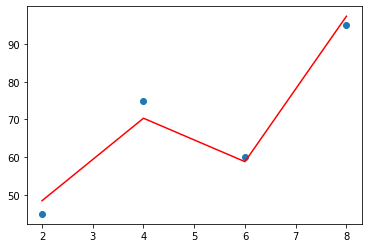

In [87]:
plt.scatter(x1, y)
plt.plot(x1, a1*x1 + a2*x2 + b, 'r')

In [88]:
# 공부시간, 문제집 몇 권이나 풀었니?

# 공부시간, 문제집, 주변 소방서 개수 -> 

a1 * 10 + a2 * 1 + b

69.16666666054014

In [89]:
# 딥러닝 깡패다 X

# 정형 데이터 : 엑셀 -> 기존의 머신러닝
# 비정형 데이터 : 음성, 이미지, 텍스트 -> 딥러닝

# 문제집, 정답지
# 데이터 전처리

# 도미 데이터

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [90]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

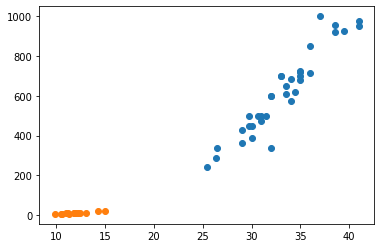

In [92]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

In [93]:
print(len(bream_length))
print(len(smelt_length))

35
14


In [94]:
# 문제집

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [96]:
data = []

for i,j in zip(length, weight):
  data.append([i,j])

data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [97]:
data = np.array(data)

In [98]:
data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [99]:
target = [1] * 35 + [0] * 14
target = np.array(target)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [101]:
# 어떻게 문제집과 정답지를 만드는지

# K최근접이웃분류 모델

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(data, target)

KNeighborsClassifier()

In [103]:
model.predict([[100, 200]])

array([1])

In [104]:
model.score(data, target)

1.0

In [105]:
target[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [106]:
model.predict(data[:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [107]:
# 데이터분할 (학습이 잘 되었는지 판단)
# 80% 훈련 20% 평가

# 35개훈련데이터 14개 평가
# 훈련데이터(도미와 빙어의 비율) 평가데이터(도미와 빙어 비율)

from sklearn.model_selection import train_test_split # 분할을 넘어서 비율까지 맞춰줍니다.

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

In [110]:
print(len(train_input))
print(len(test_input))

39
10


In [111]:
model = KNeighborsClassifier()
model.fit(train_input, train_target)

KNeighborsClassifier()

In [112]:
model.score(test_input, test_target)

1.0

In [113]:
test_target

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [114]:
model.predict(test_input)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [115]:
test_input

array([[ 34. , 685. ],
       [ 12.4,  13.4],
       [ 32. , 600. ],
       [ 10.6,   7. ],
       [ 11.8,   9.9],
       [ 34.5, 620. ],
       [ 33. , 700. ],
       [ 36. , 714. ],
       [ 29. , 430. ],
       [ 15. ,  19.9]])

In [116]:
# 데이터를 왜 분할해야하는지

# 데이터를 가져와서
# 데이터 분할
# 훈련데이터로 학습
# 시험데이터로 시험

# 가장 좋은 모델 만드는 방법

# K 최근접 이웃 : 가장 가까운 친구 5명을 가져와서 다수결

model = KNeighborsClassifier()
model.fit(train_input, train_target)

for n in range(1, 21):
  model.n_neighbors = n
  score = model.score(test_input, test_target)
  print(n, score)

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0


In [117]:
# 완벽하다고 할 수 있나?
# 길이 25 무게가 150 이면?

model = KNeighborsClassifier()
model.fit(train_input, train_target)
model.score(test_input, test_target)

1.0

In [118]:
model.predict([[25, 150]])

array([0])

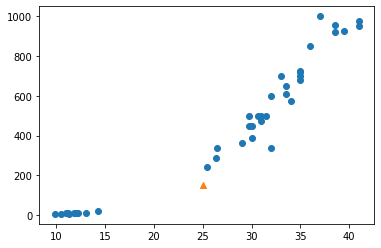

In [119]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')

In [120]:
train_input

array([[  41. ,  950. ],
       [  32. ,  600. ],
       [  11.3,    8.7],
       [  30.7,  500. ],
       [  33. ,  700. ],
       [  26.3,  290. ],
       [  29. ,  363. ],
       [  35. ,  700. ],
       [  11.8,   10. ],
       [  35. ,  680. ],
       [  41. ,  975. ],
       [  38.5,  920. ],
       [  13. ,   12.2],
       [  32. ,  340. ],
       [  29.7,  450. ],
       [  31. ,  475. ],
       [  29.7,  500. ],
       [  10.5,    7.5],
       [   9.8,    6.7],
       [  35. ,  725. ],
       [  11. ,    9.7],
       [  33.5,  650. ],
       [  36. ,  850. ],
       [  33.5,  610. ],
       [  38.5,  955. ],
       [  30. ,  390. ],
       [  35. ,  720. ],
       [  34. ,  575. ],
       [  14.3,   19.7],
       [  11.2,    9.8],
       [  39.5,  925. ],
       [  12. ,    9.8],
       [  25.4,  242. ],
       [  37. , 1000. ],
       [  26.5,  340. ],
       [  12.2,   12.2],
       [  31.5,  500. ],
       [  31. ,  500. ],
       [  30. ,  450. ]])

In [126]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

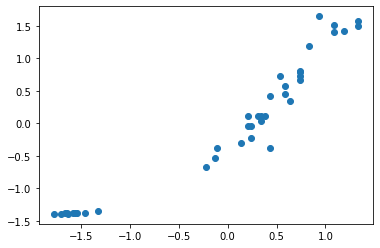

In [127]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

In [128]:
# 머신러닝 모델 - 모든 것이 훈련데이터로 학습
# 새롭게 들어온 데이터를 예측할때, 기준은 훈련데이터

model = KNeighborsClassifier()
model.fit(train_scaled, train_target)

KNeighborsClassifier()

In [129]:
model.score(test_scaled, test_target)

1.0

In [131]:
new = (np.array([25, 150]) - mean) / std

model.predict([new])

array([1])

In [133]:
# 농어 데이터

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

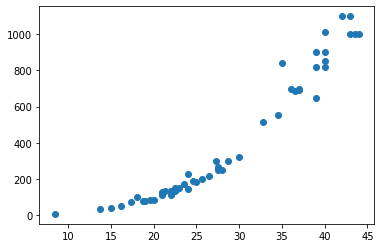

In [134]:
# 데이터를 가지고 생선을 분류
# 길이를 가지고 무게를 예측

plt.scatter(perch_length, perch_weight)

In [135]:
# K 최근접 이웃 회귀 모델

# 문제집 : 2차원 행렬
# 정답지 : 1차원 행렬

#perch_length = perch_length
perch_length.shape

(56,)

In [136]:
perch_length = perch_length.reshape(-1, 1) # -1 : 자동 // 자동행 1열
perch_length

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

In [137]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# 모델 생성 -> 데이터 분할 -> 학습 -> 평가

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, test_size = 0.2)

model = KNeighborsRegressor(n_neighbors = 3)
model.fit(train_input, train_target)

model.score(test_input, test_target)

0.9677281621276655

In [138]:
test_target

array([150. ,  51.5, 850. , 120. ,  40. , 690. , 145. , 100. , 840. ,
       700. , 120. , 556. ])

In [139]:
model.predict(test_input)

array([162. ,  69. , 841. , 131. ,  69. , 751. , 131. ,  79.6, 673.8,
       751. , 131. , 607.8])

In [141]:
np.mean(abs(model.predict(test_input) - test_target))

37.824999999999996

In [142]:
# 완벽하게 학습하면 좋은가?

# 과대적합 : 훈련데이터 정확도는 높은데, 시험 데이터의 정확도는 낮은 경우
# 과소적합(학습이 덜 된것)

# 훈련데이터의 정확도보다 시험데이터 정확도가 더 높은 경우
# 둘다 낮은 경우

print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.9808841045125671
0.9677281621276655


In [143]:
# K 최근접 이웃 회귀 모델
# 선형 회귀

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_input, train_target)

print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.9177165062566258
0.9219609930766152


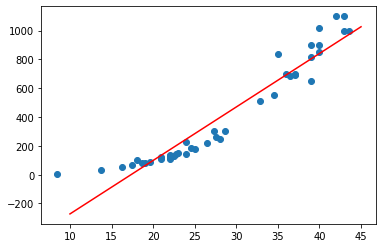

In [150]:
plt.scatter(train_input, train_target)
plt.plot(range(10, 46), model.coef_ * range(10, 46) + model.intercept_, 'r')

In [146]:
model.coef_

array([37.51488301])

In [147]:
model.intercept_

-669.5579312135394

In [ ]:
# 만약 길이 -> 무게
# 길이^2, 길이 -> 무게